In [91]:
import pickle as pickle
persons = pickle.load(open('persons_snapshot120.p', 'rb'))

480
[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119]
[7.333333333333333, 7.2, 6.073529411764706, 1.3591269841269842, 1.1375186846038865, 1.0392156862745099, 0.6871008939974457, 0.7945823927765236, 0.9971671388101983, 0.88, 0.7875, 0.7509578544061303, 0.5679611650485437, 0.689922480620155, 0.7395833333333334, 0.7272727272727273, 0.6296296296296297]


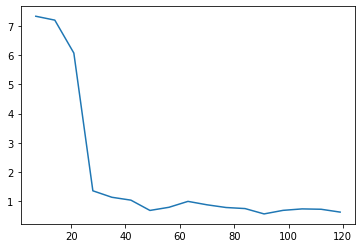

In [97]:
total_days = 120
graph_days = 119
start_day = 7
interval = 7
win_size = 7*4



#dictionary to store out edges
outdegrees = {}
for pers in persons:
    if pers.is_infected:
        if(pers.infected_by in outdegrees.keys()):
            outdegrees[pers.infected_by] += 1
        elif pers.infected_by != None:
            outdegrees[pers.infected_by] = 1
print(len(outdegrees))
win_right = start_day
x = []
y = []
while (win_right<=graph_days):
    win_left = max(win_right - win_size, 0)
    x.append(win_right)
    total_nodes = 0
    total_outedges = 0
    for pers in persons:
        if pers.is_infected:
            when_infected = total_days - pers.infected_days
            if (when_infected>=win_left and when_infected<win_right):
                total_nodes += 1
                
                if pers.id in outdegrees.keys():
                    total_outedges += outdegrees[pers.id]
    if(total_nodes==0):
        y.append(0)
    else:
        y.append(total_outedges/total_nodes)
    
    win_right += interval
    
print(x)
print(y)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y)
            
            

In [48]:
outdegrees = {}
for pers in persons:
    if(pers.infected_by in outdegrees.keys()):
        outdegrees[pers.infected_by] += 1
    elif pers.infected_by != None:
        outdegrees[pers.infected_by] = 1

26 17


In [94]:
cnt = 0
for pers in persons:
    if (pers.infected_by == 909 and pers.is_infected):
        print(pers.id, pers.infected_days)
        cnt+=1
print(cnt)

440 5
1476 0
7006 4
3


In [92]:
cnt = 0
for pers in persons:
    if pers.is_infected and pers.infected_days==0:
        cnt += 1
print(cnt)

2
